In [62]:
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'
InteractiveShell.ast_node_interactivity='last_expr'

from matplotlib import pyplot as plt
plt.style.use(['science','no-latex','grid','high-contrast','notebook']) # high-contrast指的是配色的选取
%pylab inline

# %load_ext autoreload/
# %autoreload 2
import numpy as np
import pandas as pd 
pd.options.display.max_rows=10  # 设置dataframe最多的显示行数
import os
from os import path as osp
import sys
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print(f"After inserting, sys.path is {sys.path}")

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-block alert-info">
<b> 数据默认存储位置在g2
</b> 
</div>

# LP结果验证

<div class="alert alert-block alert-info">
<b>ospf，alt-path，seer <br>
未缩放
</b> 
</div>

In [21]:
tms_abi = pd.read_csv("/home/hesy/projects/genflow/abi-6k-Mpbs.csv",header =None)
tms_abi.head()
tms_abi.shape

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.026667,0.522208,1.641339,0.335728,0.413032,0.489875,0.365077,0.817869,0.452061,0.747405,...,66.541197,36.063421,15.439312,62.781813,32.642733,91.675627,133.661405,1.980576,29.760203,187.653483
1,0.026667,0.465701,0.868099,0.148347,0.398701,1.821269,0.402144,1.090848,0.585203,0.000000,...,62.246088,34.109811,15.664965,56.823611,24.912211,100.567461,137.277728,4.411589,30.667267,190.925981
2,0.053333,0.375261,1.082379,0.276136,0.453427,1.703384,0.407152,0.403664,0.853005,0.119803,...,70.181931,29.905896,19.918581,58.658568,19.036715,92.415480,153.845555,5.300653,39.990880,218.742773
3,0.067275,0.498360,1.332205,0.121269,0.425168,0.794472,0.506747,0.142328,0.818728,0.168928,...,74.490416,44.822789,16.250043,50.589923,18.758725,97.793093,159.339533,4.490272,38.331688,265.665077
4,0.026667,0.723963,1.428480,0.165939,0.459965,0.403757,0.303256,0.257877,0.848208,0.073773,...,69.881267,44.536856,18.448840,51.095165,18.614133,93.446560,151.623424,3.487808,43.462373,210.540787


In [87]:
abi_132= pd.read_csv('../genflow/abi-6k-Mbps-132.csv',header=None,)
abi_132.head()
abi.shape

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.522208,1.641339,0.335728,0.413032,0.489875,0.365077,0.817869,0.452061,0.747405,0.388317,...,125.937728,66.541197,36.063421,15.439312,62.781813,32.642733,91.675627,133.661405,1.980576,29.760203
1,0.465701,0.868099,0.148347,0.398701,1.821269,0.402144,1.090848,0.585203,0.000000,0.680696,...,146.998333,62.246088,34.109811,15.664965,56.823611,24.912211,100.567461,137.277728,4.411589,30.667267
2,0.375261,1.082379,0.276136,0.453427,1.703384,0.407152,0.403664,0.853005,0.119803,0.436928,...,132.247843,70.181931,29.905896,19.918581,58.658568,19.036715,92.415480,153.845555,5.300653,39.990880
3,0.498360,1.332205,0.121269,0.425168,0.794472,0.506747,0.142328,0.818728,0.168928,0.171541,...,120.693360,74.490416,44.822789,16.250043,50.589923,18.758725,97.793093,159.339533,4.490272,38.331688
4,0.723963,1.428480,0.165939,0.459965,0.403757,0.303256,0.257877,0.848208,0.073773,0.359965,...,138.325472,69.881267,44.536856,18.448840,51.095165,18.614133,93.446560,151.623424,3.487808,43.462373


## gea

In [35]:
ppath="/home/hesy/projects/g8guifei/wzy/hesy_sum/output/GEA"

In [36]:
gea_shr,gea_ap,gea_se = np.loadtxt( osp.join(ppath,'shr_9988.txt') ),np.loadtxt( osp.join(ppath,'ap_9988.txt') ),np.loadtxt( osp.join(ppath,'se_9988.txt') )

Text(0.5, 1.0, 'GEA')

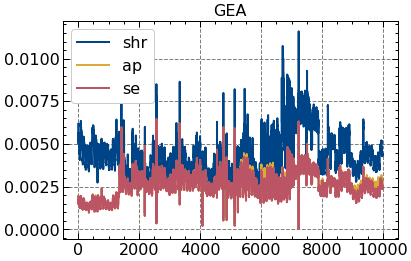

In [65]:
plt.plot(range(len(gea_shr)),gea_shr)
plt.plot(range(len(gea_ap)),gea_ap)
plt.plot(range(len(gea_se)),gea_se)

plt.legend(['shr','ap','se'])
plt.title('GEA')

In [50]:
cpm = pd.DataFrame([gea_shr,gea_ap,gea_se]).transpose()
cpm.columns=[ 'shr','ap','se' ]
cpm_desc=cpm.describe()

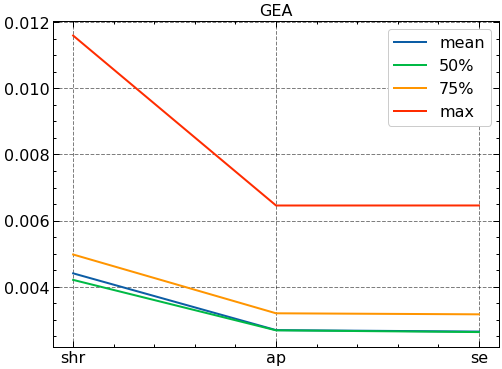

In [66]:
with plt.style.context(['science', 'no-latex','grid','notebook']):
    plt.plot(cpm_desc.loc['mean'],label='mean')
    plt.plot(cpm_desc.loc['50%'],label='50%')
    plt.plot(cpm_desc.loc['75%'],label='75%')
    plt.plot(cpm_desc.loc['max'],label='max')
    plt.legend()
    plt.title('GEA')

## abi

In [67]:
ppath="/home/hesy/projects/g8guifei/wzy/hesy_sum/output/Abi"

In [90]:
abi_shr,abi_ap,abi_se = np.loadtxt( osp.join(ppath,'shr_6k.txt') ),np.loadtxt( osp.join(ppath,'ap_6k.txt') ),np.loadtxt( osp.join(ppath,'se_6k.txt') )

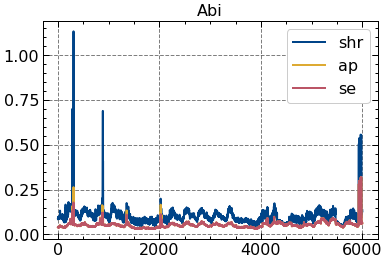

In [69]:
plt.plot(range(len(abi_shr)),abi_shr)
plt.plot(range(len(abi_ap)),abi_ap)
plt.plot(range(len(abi_se)),abi_se)

plt.title('Abi')
plt.legend(['shr','ap','se'])

In [70]:
cpm = pd.DataFrame([gea_shr,gea_ap,gea_se]).transpose()
cpm.columns=[ 'shr','ap','se' ]
cpm_desc=cpm.describe()

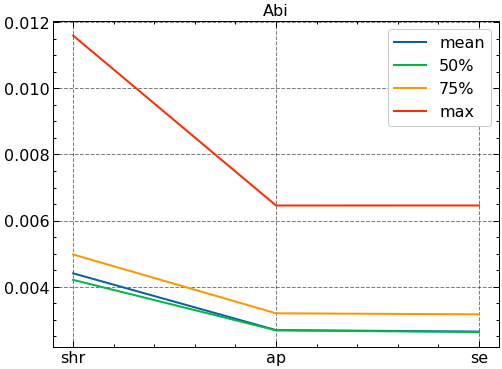

In [71]:
with plt.style.context(['science', 'no-latex','grid','notebook']):
    plt.plot(cpm_desc.loc['mean'],label='mean')
    plt.plot(cpm_desc.loc['50%'],label='50%')
    plt.plot(cpm_desc.loc['75%'],label='75%')
    plt.plot(cpm_desc.loc['max'],label='max')
    plt.legend()
    plt.title('Abi')

## 结论

### LP结果正确性验证

<div class="alert alert-block alert-info">
<b>ospf得到的结果确实比ap和se要差，且ap和se看起来差不多，但是看describes数据，整体性能是差很多的
</b> 
</div>

### 缩放比

#### gea

Text(0.5, 1.0, 'GEA_scale100')

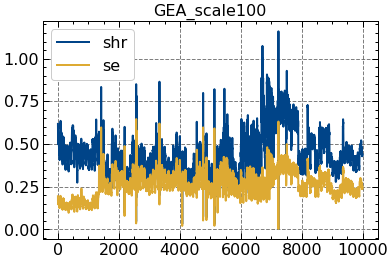

In [98]:
topo="GEA"
scale =100
plt.plot(range(len(gea_shr)),gea_shr*scale)
plt.plot(range(len(gea_se)),gea_se*scale)
plt.legend( [ 'shr','se' ] )
plt.title(f"{topo}_scale{scale}")

Text(0.5, 1.0, 'GEA_scale80')

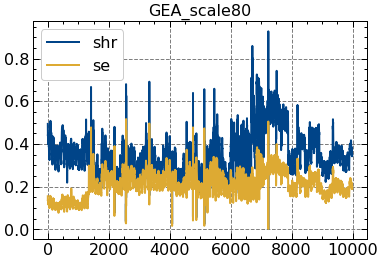

In [99]:
topo="GEA"
scale =80
plt.plot(range(len(gea_shr)),gea_shr*scale)
plt.plot(range(len(gea_se)),gea_se*scale)
plt.legend( [ 'shr','se' ] )
plt.title(f"{topo}_scale{scale}")

<div class="alert alert-block alert-info">
在shr流量情况下，gea其实放大100倍，优化空间还是很高
<b> 所以确定为放大100倍
</b> 
   
</div>

#### abi

(0.0, 2.0)

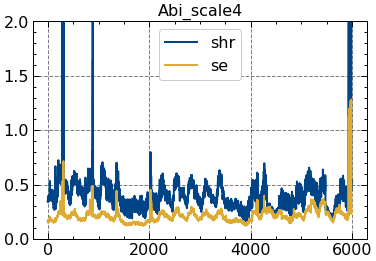

In [109]:
topo="Abi"
scale =4
plt.plot(range(len(abi_shr)),abi_shr*scale)
plt.plot(range(len(abi_se)),abi_se*scale)
plt.legend( [ 'shr','se' ] )
plt.title(f"{topo}_scale{scale}")
plt.ylim([0,2])

(0.0, 2.0)

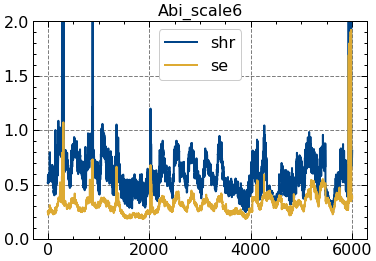

In [112]:
topo="Abi"
scale =6
plt.plot(range(len(abi_shr)),abi_shr*scale)
plt.plot(range(len(abi_se)),abi_se*scale)
plt.legend( [ 'shr','se' ] )
plt.title(f"{topo}_scale{scale}")
plt.ylim([0,2])

<div class="alert alert-block alert-info">
    在shr流量情况下，<b> abi其实放大4倍就差不多了。<\b>
    <br>
    另一方面，要注意，<b>取前4k个数据差不多了，接近6k的数据似乎有点问题</b> 
</div>

---

# TM数据(GEANT)

## 分析

In [5]:
tms = pd.read_csv("/home/hesy/projects/genflow/gea-9988-Mbps.csv",header =None)#*8/(9*10**5)# --> changes ori to Mbps
des = tms.transpose().describe()
print(f"des.shape is {des.shape}")
print(f"tms.shape is {tms.shape}")
tms.head()

des.shape is (8, 9988)
tms.shape is (9988, 529)


,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
0,0.000619,0.179845,1.092293,0.225766,2.890328,0.115929,0.149449,1.662423,3.249104,0.0,...,0.000116,0.003495,0.001855,0.023599,0.003970,0.001099,0.019200,0.014409,0.004897,0.0
1,0.000776,0.119931,0.822905,0.220074,2.608241,0.092302,0.147640,1.496076,3.010443,0.0,...,0.000122,0.000561,0.006485,0.018455,0.001282,0.002537,0.000833,0.009887,0.003832,0.0
2,0.000809,0.080779,0.810575,0.199942,2.543415,0.100608,0.123332,1.550540,3.084200,0.0,...,0.000682,0.000246,0.002363,0.026669,0.004361,0.001213,0.000334,0.015791,0.001616,0.0
3,0.000550,0.072630,0.787669,0.189035,2.606974,0.093107,0.079639,1.527909,3.053899,0.0,...,0.000003,0.004850,0.000371,0.029072,0.006354,0.000719,0.016797,0.007489,0.001717,0.0
4,0.000625,0.094076,0.530138,0.246777,2.644017,0.082445,0.069661,1.549725,2.996552,0.0,...,0.000000,0.000600,0.000521,0.006746,0.010485,0.000696,0.001557,0.006787,0.007353,0.0


## ori logic -- deprecated

tms=tms.drop(5140)
tms.index = range(10**4-1)

In [3]:
p25,p75 = des.loc["25%",:].values,des.loc["75%",:].values
mean_ = des.loc["mean",:].values
max_ = des.loc["max",:].values
data_distribs =[p25,mean_,p75,max_]
distribs_names = [["p25"],["mean"],["p75"],["max"]]

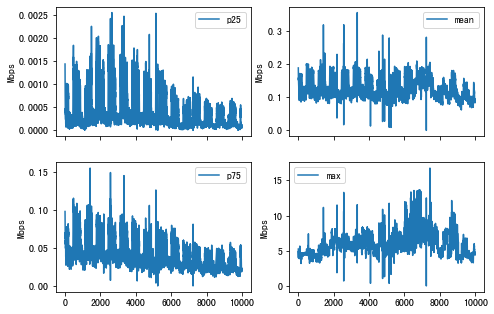

In [35]:
fig,ax=plt.subplots(2,2,sharex='col')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)

for idx, data in enumerate(data_distribs):
#     ax[idx//2,idx%2].plot(range(5100,5200),data[5100:5200])
    ax[idx//2,idx%2].plot(range(len(data)),data)
    ax[idx//2,idx%2].set_ylabel("Mbps")
    ax[idx//2,idx%2].legend(distribs_names[idx])

### 寻找合适的缩放比

In [527]:
pf = pd.DataFrame(np.loadtxt("/home/guifei/projects/g8_hesy/LP_Final/LP_output/pr_GEA_seer_trueTM3999.txt"))
des_pf = pf.describe()

In [ ]:
pf_ = pf*40
des_pf_ = pf_.describe()
# print(des_pf_.iloc[:,0])
des_pf_

Text(0.5, 1.0, 'cdf')

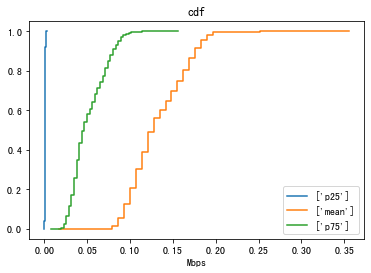

In [568]:
import statsmodels.api as sm
cdf_data=[]

# for idx, data in enumerate(data_distribs):
for idx, data in enumerate(data_distribs[:-1]):  # 不要包含max ，差太多了
    ecdf = sm.distributions.ECDF(data)
    #等差数列，用于绘制X轴数据
    x = np.linspace(min(data), max(data))
    # x轴数据上值对应的累计密度概率
    y = ecdf(x)
#     cdf_data.append({"x":x,"y":y})
#     plt.step(data["x"],data["y"])
    plt.step(x,y)

plt.legend(distribs_names)

plt.xlabel("Mbps")
plt.title("cdf")

## 处理(生成flows)

数据文件的地址：(g14)

/home/hesy/pro/g8/genflow/TmDataIn15min.txt

/home/hesy/pro/g8/genflow/codes-trueTM/tencent_cdf.txt

<div class="alert alert-block alert-info">
<b>查看腾讯数据cdf的情况</b> 
</div>

In [32]:
cdfData_ori= np.loadtxt("/home/hesy/projects/genflow/codes-trueTM/tencent_cdf.txt")

截去长尾，修改长尾

In [33]:
tmp = cdfData_ori[:-1]
cdfData = np.append(tmp,[[1e+5, 1]],axis =0)

In [6]:
cdfData,tmp

(array([[0.00000000e+00, 0.00000000e+00],
        [8.40000000e+01, 2.46714679e-01],
        [9.00000000e+01, 3.47627520e-01],
        [1.19000000e+02, 4.34059571e-01],
        [1.67000000e+02, 5.42245725e-01],
        [2.60000000e+02, 6.40284114e-01],
        [5.48000000e+02, 7.40204331e-01],
        [1.40400000e+03, 8.40000374e-01],
        [1.89600000e+03, 9.40010542e-01],
        [2.92400000e+03, 9.60006123e-01],
        [4.43400000e+03, 9.80519907e-01],
        [8.33700000e+03, 9.89999874e-01],
        [1.60930000e+04, 9.94000359e-01],
        [2.97120000e+04, 9.96009727e-01],
        [5.80950000e+04, 9.98029633e-01],
        [8.90470000e+04, 9.98999553e-01],
        [1.00000000e+05, 1.00000000e+00]]),
 array([[0.00000000e+00, 0.00000000e+00],
        [8.40000000e+01, 2.46714679e-01],
        [9.00000000e+01, 3.47627520e-01],
        [1.19000000e+02, 4.34059571e-01],
        [1.67000000e+02, 5.42245725e-01],
        [2.60000000e+02, 6.40284114e-01],
        [5.48000000e+02, 7.40204

Text(0.5, 1.0, 'distribution of flow size at tencent gateway')

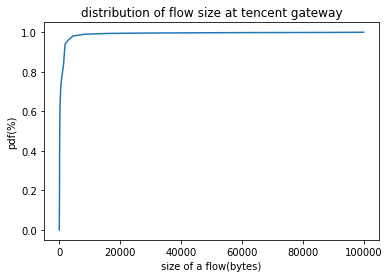

In [6]:
# nums,pdf = cdfData_ori[:,0],cdfData_ori[:,-1]
nums,pdf = cdfData[:,0],cdfData[:,-1]
plt.plot(nums,pdf)
plt.xlabel("size of a flow(bytes)")
plt.ylabel("pdf(%)")
plt.title("distribution of flow size at tencent gateway")

---

<div class="alert alert-block alert-info">
<b>人工放缩比</b>
<br> 这两个参数其实最后会影响flows[fromNode][toNode]的流的数量 和 分布(scale调整数量，scale_调整分布)
</div>

#### 人工缩放比(hypermeters)

In [40]:
scale = 1 # hesy:这个缩放比不是真实数据的得到的，是我们自己搞的，为了让流量合理 （直接作用在TM流量上）
# scale_ =1000 # hesy: 人工对cdf数据的调整
scale_ =1 # hesy: 人工对cdf数据的调整 （目前没有修改过这个
# scale_ =0.25 # hesy: 人工对cdf数据的调整 （目前没有修改过这个

In [41]:
from bisect import bisect
def chazhi(nums,distributionOfFlows,poss=None): # -> 根据cdf采样得到的随机生成的流大小
#     global scale_ 
    poss = np.random.random() if not poss else poss
    index,poss2num = 0,0
    while index<1:  # 其实一般来讲index不会<1的
        index = bisect(distributionOfFlows, poss)
    # 线性插值  (end_y-p_y)/(end_y-begin_y) = (end_x-p_x)/(end_x-begin_x)
    poss2num = nums[index] - (distributionOfFlows[index] - poss)/(
    distributionOfFlows[index] - distributionOfFlows[index-1])*(nums[index]-nums[index-1])
#     if int(poss2num)==0:
#         print(f"poss2num is 0 when index is {index} and poss is {poss}")
    return poss2num/scale_   # 其实不一定要整数，出来的太规整了吧...

def generateFlows(nums,distributionOfFlows,flowSize): # -> List
    sumFlow = 0
    flows = []
    while sumFlow<flowSize:
        tmp = chazhi(nums,distributionOfFlows)
        if tmp:  # 因为小数的原因...有时候会出现0
            sumFlow+=tmp
            flows.append(tmp)
    if flowSize:
        sumFlow-=flows.pop()
        flows.append(flowSize-sumFlow)
    return flows

<div class="alert alert-block alert-info">
<b>取4500-4600</b> 
</div>

#### 529->506

In [80]:
tms_506 = pd.read_csv('/home/hesy/projects/genflow/gea-9988-Mbps-506.csv',header=None)  # 存的时候都是header=None
tms_506_.shape

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,0.179845,1.092293,0.225766,2.890328,0.115929,0.149449,1.662423,3.249104,0.0,0.045254,...,0.004311,0.000116,0.003495,0.001855,0.023599,0.003970,0.001099,0.019200,0.014409,0.004897
1,0.119931,0.822905,0.220074,2.608241,0.092302,0.147640,1.496076,3.010443,0.0,0.013565,...,0.007581,0.000122,0.000561,0.006485,0.018455,0.001282,0.002537,0.000833,0.009887,0.003832
2,0.080779,0.810575,0.199942,2.543415,0.100608,0.123332,1.550540,3.084200,0.0,0.100460,...,0.004604,0.000682,0.000246,0.002363,0.026669,0.004361,0.001213,0.000334,0.015791,0.001616
3,0.072630,0.787669,0.189035,2.606974,0.093107,0.079639,1.527909,3.053899,0.0,0.799323,...,0.005514,0.000003,0.004850,0.000371,0.029072,0.006354,0.000719,0.016797,0.007489,0.001717
4,0.094076,0.530138,0.246777,2.644017,0.082445,0.069661,1.549725,2.996552,0.0,0.049241,...,0.006374,0.000000,0.000600,0.000521,0.006746,0.010485,0.000696,0.001557,0.006787,0.007353


#### 划分训练测试集并输出到文件中去

In [43]:
tm4500_4600 = tms_506.iloc[4500:4600,:]*30*scale/100 # len(tm1) = 506 = 23*23 # 因为ns3里面带宽缩小了100倍，所以这里也除以100。 # 30代表30s
len_tms = len(tm4500_4600)
tm4500_4600.index = range(len_tms)
# 注意，这里别搞成小数
#这里的单位是MBps，但是我没有*8，相当于整体缩小了8倍

In [44]:
flows_ =[ [] for _ in range(len_tms)] 
# flows = np.array([[[] for _ in range(22)] for _ in range(23)])  # 23*22的list
flows = [[[0 for _ in range(22)] for __ in range(23)] for ___ in range(len_tms)] # len(tm)*23*22的list
flowNum =[[[ 0 for _ in range(22)] for __ in range(23)] for ___ in range(len_tms)]
# for fromNode in range(2):
#     for toNode in range(2)
import ipdb

try:
    for tmIdx in range(len_tms):
        for fromNode in range(23):
            for toNode in range(22):

                flows[tmIdx][fromNode][toNode]=generateFlows(nums,pdf,tm4500_4600.iloc[tmIdx,fromNode*22+toNode]*(10**6)/8) # Mbps --> Bps
                flows_[tmIdx].extend(flows[tmIdx][fromNode][toNode])
                flowNum[tmIdx][fromNode][toNode] = len(flows[tmIdx][fromNode][toNode])
                
except:
    print(f"tmIdx,fromNode,toNode is {tmIdx},{fromNode},{toNode} ")
    print(f"fromNode*22+toNode is {fromNode*22+toNode} ")    

In [ ]:
flows_[:3]

flows : list of 1000 * 23 * 22 , each is also a list
flows_: list of 1000 个list , which 

<div class="alert alert-block alert-info">
<b>如果每条流的CBR是1/10的2488 --> 2le6 30s最多让你发，所以这个flows里面的数值最大是60(le6是本来就要缩放的大小)</b> 
<br> 现在check下到底是多少以决定要缩放多少
</div>

scale为1的时候，mean是le3,max是le5。 <br>
所以将scale设置为1000试试（再缩小1000倍）。

进一步的，如果采用On-Off的形式，ratio为10的情况下，发送时间(x)和关闭时间(y)要满足的大小关系是(y=9x),所以就让发送时间为10s的话，开的时间不能超过1s,which means30s内实际能发的是2(le6)*3而不是2(le6)*30 --> 所以流最好别超过6le6

### 生成流的查看 -- 最初TM1的生成情况 作为基准(肯定正确的)

<div class="alert alert-block alert-info">
<b>生成的单位都是B了</b> 
</div>

#### 流的大小分布情况查看[此为lam为40的情况用于参考]

In [22]:
print(len(flows_))
print(len(flows_[0]))

100
123188


In [35]:
anaFlow=[]
for item in flows_:
    anaFlow.extend(item)

In [37]:
len(anaFlow)

12207211

In [39]:
print(np.percentile(anaFlow, 50))
print(np.percentile(anaFlow, 95))
max(anaFlow)

147.94247496547217
2373.626801297712


99998.75795006772

In [ ]:
原结果是148，400+ 和 9988

Text(0, 0.5, 'cdf')

/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-p

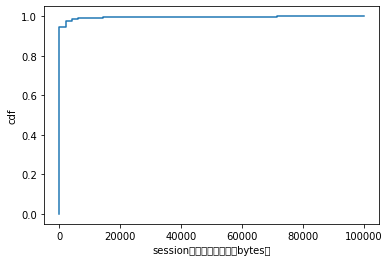

In [41]:
import statsmodels.api as sm
# data = flows_
data = anaFlow
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流大小（bytes）")
plt.ylabel("cdf")

大流不多

??? 50% 是100多B是不是有点小了...

#### 流的大小分布情况查看[此次生成的情况参考]

In [50]:
print(len(flows_))
print(len(flows_[0]))

100
54757


In [51]:
anaFlow=[]
for item in flows_:
    anaFlow.extend(item)

In [52]:
len(anaFlow)

5523274

In [53]:
print(np.percentile(anaFlow, 50))
print(np.percentile(anaFlow, 95))
max(anaFlow)

590.1091311533567
9354.73133509959


399965.92914713355

上述是流大小的分布

Text(0, 0.5, 'cdf')

/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-p

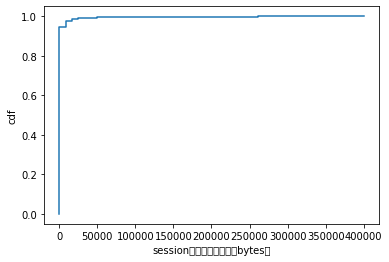

In [54]:
import statsmodels.api as sm
# data = flows_
data = anaFlow
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流大小（bytes）")
plt.ylabel("cdf")

#### session对之间生成的流的数量分布情况查看[lam为40的供参考]

<div class="alert alert-block alert-info">
<b>查看下session * session的flows的num数量大概是多少</b> 
</div>

In [42]:
flowNums_= np.array(flowNum).reshape((-1,))
print(np.percentile(flowNum, 50))
print(np.percentile(flowNum, 95))
max(flowNums_)  

17.0
978.0499999999956


14864

Text(0, 0.5, 'cdf')

/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-p

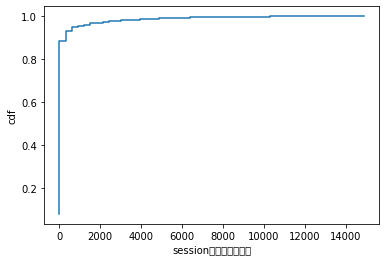

In [43]:
import statsmodels.api as sm
data = flowNums_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流数量")
plt.ylabel("cdf")

1s内流的数量不超过300条 ，变成30s之后就是不超过le4条

<div class="alert alert-block alert-info">
<b>这个单位就全都是bytes了</b> , 上面生成流的过程中全部转为bytes了
</div>

In [44]:
flows_ = pd.DataFrame(flows)
# flows_.iloc[0,3]
flows_.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,"[[899.9590736602594, 2.210035999876226, 503.29...","[[32.8947833733154, 85.2846303098136, 38.26458...","[[240.87350645441518, 142.69237315538595, 196....","[[67.43036970252876, 19.733215682566353, 832.2...","[[557.3183165381788, 67.37182174714613, 57.490...","[[98.36037868681962, 85.65300696713378, 42.738...","[[], [6.637333333333332], [85.87514768073771, ...","[[85.2492092431161, 78.01772479877587, 2003.64...","[[386.86586322150697, 27.3351581973308, 76.411...","[[1753.9956105624958, 83.28358767522782, 112.7...",...,"[[254.88666400524218, 73.31971456381619, 33.05...","[[504.1847506700464, 165.4476628215483, 156.35...","[[133.023818442633, 332.75059273244995, 68.479...","[[133.60126468074478, 1399.465145071621, 96.31...","[[46.76765180004713, 586.5018144995475, 1297.8...","[[], [58.85098974859595, 267.193010251304], [8...","[[62.93333333333332], [36.62266666666667], [18...","[[104.88819482043722, 199.41605786428323, 79.3...","[[67.24450786217801, 158.49143450711705, 54.07...","[[972.0067381886666, 11.805229879967385, 1578...."
1,"[[218.67131323303764, 389.7693500305548, 1779....","[[13.474008856766517, 437.7259911432334], [7.9...","[[85.89334963794863, 312.39808229028733, 173.9...","[[85.71397468618105, 231.14307821048624, 263.0...","[[15.911787800452714, 168.12111797359034, 115....","[[38.336752759506226, 2.80559405439152, 1149.6...","[[], [4.741333333333333], [175.68333937599988,...","[[42.765459068504704, 1107.5482718558865, 117....","[[44.17633605192778, 185.15863137179736, 63.67...","[[655.1189541398671, 613.503712526733], [115.5...",...,"[[4.702058359052117, 131.582130528976, 134.025...","[[13.656249720339687, 807.5584169462604], [13....","[[24.98912381614825, 93.95948098743692, 30.477...","[[123.54955929439777, 126.57059699351633, 1420...","[[165.88297686859983, 633.9798898073163, 41.40...","[[], [185.63793253105, 15.008149981712378, 697...","[[8.533333333333331], [542.6959999999501], [15...","[[67.63410762983013, 76.27672634973116, 850.91...","[[194.94008174013868, 2467.2267363588926, 88.2...","[[6299.9907518379005, 85.44038528363753, 86.70..."
2,"[[751.0764233344867, 234.75166794245084, 58.83...","[[1.112047475084637, 977.4959525248654], [486....","[[1729.1129141610268, 1744.2460994891449, 102....","[[678.7691450872221, 21.301275164766814, 84.69...","[[0.5069103394320393, 131.199933124771, 569.84...","[[206.7938614595538, 1249.7981385403957], [89....","[[22.992], [76.91866666666668], [16.6316794770...","[[5.958379888101291, 1828.3370841390138, 39.33...","[[6600.21186037913, 65.80875872349841, 137.997...","[[84.82093255474632, 175.50325342038474, 2323....",...,"[[1205.2884368342488, 86.66629222482923, 41.04...","[[236.49688368688498, 149.27452135634817, 40.2...","[[1845.8812835326817, 68.27053906205288, 120.0...","[[1116.5159094027124, 178.23225278239897, 112....","[[315.99804715993, 106.55808787568853, 1489.88...","[[], [127.12429297535164, 1616.7301311401407, ...","[[40.46273780713324, 49.82092569491911, 59.957...","[[85.69319380110213, 1962.8089577843282, 86.37...","[[56.98028381576634, 1687.304852597869, 51.937...","[[213.83277314185705, 68.97648106891539, 456.7..."
3,"[[89.53809505896791, 513.1357693694753, 750.52...","[[73.02084152208097, 78.86189861703234, 86.566...","[[7.234790195082226, 64.15581854491205, 30.997...","[[3550.504198071988, 54.634494606707065, 73.19...","[[71.58038974407634, 1068.8892780045344, 338.8...","[[592.9479999999], [101.86207554762677, 309.84...","[[], [23.704], [32.87870775469838, 144.8986255...","[[115.58666511709133, 1770.098448599625, 155.5...","[[10.264412747430882, 7.60738263016799, 1494.2...","[[473.7326259060785, 429.8154557665498, 89.229...",...,"[[1852.1665948461823, 1179.1814051537176], [16...","[[87.20909253355168, 125.90895153510004, 339.0...","[[458.0742473515379, 159.24024536157324, 1565....","[[33.05541043675081, 209.38537174753, 118.2831...","[[155.39114493811738, 1540.3001883768543, 191....","[[], [530.4893333332

#### session对之间生成的流的数量分布情况查看【此为此次的情况】

<div class="alert alert-block alert-info">
<b>查看下session * session的flows的num数量大概是多少</b> 
</div>

In [13]:
flowNums_= np.array(flowNum).reshape((-1,))
print(np.percentile(flowNum, 50))
print(np.percentile(flowNum, 95))
max(flowNums_)  

4.0
121.0


1900

流的大小本身变得很大，那么流的数量就相应减小

Text(0, 0.5, 'cdf')

/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-p

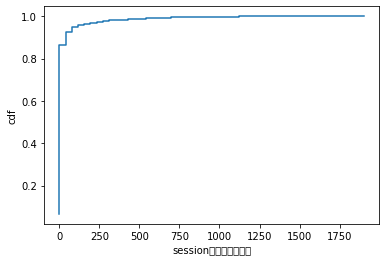

In [14]:
import statsmodels.api as sm
data = flowNums_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流数量")
plt.ylabel("cdf")

1s内流的数量不超过300条 ，变成30s之后就是不超过le4条

<div class="alert alert-block alert-info">
<b>这个单位就全都是bytes了</b> , 上面生成流的过程中全部转为bytes了
</div>

In [39]:
flows_ = pd.DataFrame(flows)
# flows_.iloc[0,3]
flows_.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,"[[332.88327558197517, 1104.338345206197, 85.19...","[[53.28418163398089, 2770.389818366007], [40.5...","[[123.88582126832456, 127.26343273694732, 85.8...","[[254.94242873512994, 64.7700222803297, 1053.6...","[[407.3565426371456, 40.42233329629662, 102.71...","[[235.74948079470985, 30.191185871952655], [6....","[[46.44723441018271, 171.9110949652249, 1452.8...","[[85.41684535411883, 2.621207585892904, 399.12...","[[159.22766510754158, 345.5562331674922, 1581....","[[133.1917626645148, 110.58068250561072, 5.017...",...,"[[913.6088640664126, 71.11485137680825, 71.639...","[[67.48149999999374], [15.880228941974593, 183...","[[163.29505977119493, 1560.3457874392402, 205....","[[65.4607133781149, 161.6371249374905, 89.8128...","[[108.90186593187542, 55.091576595164085, 1681...","[[236.2369999999875], [87.54620944719444, 260....","[[416.59266666665627], [273.3208632122369, 102...","[[35.57020965500743, 84.50480974904134, 236.99...","[[352.13147725390183, 85.91561322065361, 0.708...","[[38.48006232784262, 13.297771005482367], [91...."
1,"[[1527.276461494568, 242.36719228075964, 21.28...","[[1957.7315008266107, 461.26217796788296, 1833...","[[3071.71738989208, 50.43955014279778, 1188.06...","[[918.1491715555346, 64.59980649544093, 85.072...","[[96.16239492736723, 25.972053018185775, 838.6...","[[260.3111666666625], [123.47014995660565, 129...","[[4.712448338592296, 636.7002034053153, 127.64...","[[1462.4422167075286, 80.6452035098435, 87.406...","[[1459.7169581713738, 3.5122430192323293, 41.0...","[[160.1017348764284, 42.107053448307006, 220.7...",...,"[[57.66740083328246, 70.94843878107089, 277.71...","[[140.69358015487262, 57.45458651178987], [193...","[[697.2585350336097, 351.5587954035777, 150.20...","[[1229.822828223631, 1476.420229711821, 1.1496...","[[1439.5010384224106, 789.5211282442519], [85....","[[60.86632327968492, 22.387228626258178, 52.34...","[[86.80152735209666, 147.5549258481906, 279.91...","[[463.04406231085676, 248.40030786121503, 1707...","[[114.82501585728147, 8.359050313653768, 179.1...","[[34.708010185268826, 89.30682314805617], [305..."
2,"[[84.5257587320144, 89.45887992986282, 86.9037...","[[460.84670528715736, 50.552467103707095, 144....","[[84.19896682221415, 45.814452903241346, 43.46...","[[594.610623326856, 23794.2930433398], [101.67...","[[78.45242298438428, 15.73047391007708, 140.07...","[[68.68706622341645, 197.2655163037843, 135.30...","[[121.12317309084291, 107.07214397530282, 146....","[[26.07175757543383, 47.59215335748276, 87.103...","[[158.06688824822766, 47.8541662479796, 101.87...","[[62.02092949140015, 51.4840978863154, 1086.94...",...,"[[1132.1160765739146, 80.64960010435085, 16.30...","[[94.61254840652896, 11.43195159345855], [503....","[[422.5855303643823, 362.1089272548213, 91.414...","[[170.60189125819, 16.109519180094594, 437.047...","[[17.126910154436445, 115.83355820040109, 502....","[[193.48149999999373], [252.79751262309819, 7....","[[544.5481666666501], [1105.30366666665], [4.6...","[[86.89368894597857, 146.01883892208204, 1841....","[[47.519361850562554, 175.1341718617935, 30.77...","[[87.95549999999999], [5.604369074003316, 56.0..."
3,"[[269.13946291694646, 88.31611714357854, 86.04...","[[69.868549152689, 88.53235936408892, 231.3611...","[[18.528378447704, 1691.4273786313374, 1022.02...","[[96.4324887664508, 162.1819602835482, 215.015...","[[863.3164348879988, 100.8132245400828, 70.673...","[[88.78652646609765, 181.36164020056486], [391...","[[89.17272794177102, 89.04691316627472, 98.464...","[[2658.312971866752, 4755.03366039352, 146.580...","[[2619.72211025501, 89.88717839922083, 206.857...","[[118.8000448836596, 403.92474468137374, 323.7...",...,"[[172.81680467368855, 114.07339324726628, 627....","[[148.47399999999377], [84.1136966011342, 113....","[[103.36088846283182, 284.96386577383157, 1378...","[[10.583571568672753, 88.55453807793418, 1019....","[[86.61186036319116, 1483.989612148077, 635.39...","[[101.99919945032536

### TM 4503 查看 -- check 【lam为40的情况供参考】

#### 流的大小分布情况查看

In [ ]:
print(np.percentile(flows_[3], 50))
print(np.percentile(flows_[3], 95))
max(flows_[3])

跟上面的差不多哈，感觉没有造错

In [ ]:
import statsmodels.api as sm
data = flows_[3]
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流大小（bytes）")
plt.ylabel("cdf")

In [ ]:
大流不多

??? 50% 是100多B是不是有点小了...

#### session对之间生成的流的数量分布情况查看

<div class="alert alert-block alert-info">
<b>查看下session * session的flows的num数量大概是多少</b> 
</div>

In [26]:
flowNums_= np.array(flowNum[3]).reshape((-1,))
print(np.percentile(flowNums_, 50))
print(np.percentile(flowNums_, 95))
max(flowNums_)  

28.0
1809.5


16507

Text(0, 0.5, 'cdf')

/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-p

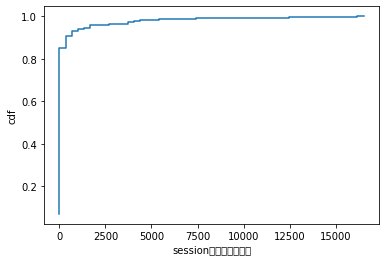

In [27]:
import statsmodels.api as sm
data = flowNums_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流数量")
plt.ylabel("cdf")

1s内流的数量不超过300条 ，变成30s之后就是不超过le4条

<div class="alert alert-block alert-info">
<b>这个单位就全都是bytes了</b> , 上面生成流的过程中全部转为bytes了
</div>

In [28]:
len(pd.DataFrame(flows).iloc[2,1][3])

56

In [45]:
flows_ = pd.DataFrame(flows)
# flows_.iloc[0,3]
flows_.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,"[[85.488082837786, 42.550605976633584, 49.8281...","[[133.92577403134692, 199.20718671426854, 231....","[[206.62110969249858, 173.3724123299486, 1036....","[[221.45823062541632, 1412.4150508375046, 138....","[[1582.6426160854262, 84.0692446584513, 1139.1...","[[53.188133333332495], [2.0082605551922086, 47...","[[580.10073333333], [87.57664142902256, 84.841...","[[569.6115528870814, 551.5144835856387, 1411.6...","[[172.8997921819955, 635.692052513481, 68.4627...","[[85.56566111816178, 135.49507221516814], [154...",...,"[[240.03066782120987, 32.146761241174346, 191....","[[13.49629999999875], [30.50729285235338, 27.4...","[[253.5528192131821, 69.79212574732665, 1626.6...","[[140.3730256238627, 34.78676022401097, 58.755...","[[369.0044333333326], [1773.3217785681288, 95....","[[47.2473999999975], [69.62073333333001], [], ...","[[83.31853333333125], [352.8514686478673, 163....","[[155.22534658561148, 281.86205341438847], [86...","[[87.75109999999876], [557.3007333333301], [34...","[[10.355566666664998], [46.802313557637696, 13..."
1,"[[83.25491113553501, 1378.3567244418684, 75.27...","[[850.4207333333325], [13.982233333331251], [2...","[[3.583375564122008, 994.1640984290468, 503.50...","[[129.53028999508194, 133.54175914216435, 1586...","[[69.23126345571666, 97.75225868293413, 135.19...","[[52.06223333333249], [85.27804949319227, 441....","[[457.5391847152413, 694.7837819514236], [61.9...","[[36.2876787852865, 1699.8694096622337, 144.56...","[[84.43809730352254, 85.64727003586297, 9.6570...","[[149.02223333333248], [1297.8461448712728, 16...",...,"[[444.54519999999746], [973.0170514555049, 648...","[[39.6296333333325], [38.767399999998744], [],...","[[1897.988755319292, 66.50585938367418, 133.72...","[[84.06553336677864, 18.876550511730073, 4.186...","[[67.84003797651127, 377.96439535682134], [1.8...","[[30.71406666666375], [72.681466666665], [0.15...","[[3.8675061610338446, 98.98582717229745], [90....","[[483.7155666666637], [158.24336505052733, 3.9...","[[98.09186666666623], [171.40848343583713, 33....","[[24.802966666665004], [61.131866666666255], [..."
2,"[[87.96362992379683, 684.0533439667272, 378.88...","[[86.96931540106607, 151.31894856636913, 25.94...","[[87.55863113259214, 118.02894989498004, 920.9...","[[1185.637553131986, 99.02694264198601, 21.606...","[[339.16735052090746, 142.5470738128188, 8.286...","[[102.56593333333124], [43.14675993462723, 992...","[[62.349739592333876, 236.8209942969889, 164.0...","[[315.3229856344304, 102.7585798072233, 143.53...","[[89.05628468089549, 937.3868970649573, 85.116...","[[27.40643712766478, 246.7328295390002], [43.5...",...,"[[164.91634274356653, 372.9829239230985], [190...","[[21.2088999999975], [83.48841474959185, 17.15...","[[1528.4062406125, 56.310067871169004, 562.683...","[[0.6043382365596983, 20.211781530874575, 429....","[[438.50073333333], [132.01396716259273, 63.14...","[[38.69629999999875], [43.31454720894065, 8.78...","[[51.227526146402425, 57.68210718692758], [60....","[[415.0222333333313], [99.03242153274431, 1460...","[[118.39935146763857, 5.070281865692692], [699...","[[17.591099999999997], [93.80443333333125], []..."
3,"[[85.80919429047042, 22.814708548029188, 587.2...","[[63.04401069786216, 205.73259553561454, 89.45...","[[8.527773362875479, 127.22183786504044, 84.83...","[[133.30017433979071, 5000.892425660208], [18....","[[4137.854799999997], [125.72109439375605, 75....","[[54.029633333332505], [115.68423362267413, 19...","[[433.5855387317418, 68.16549946325458, 375.80...","[[222.11682673742268, 1859.3557025602397, 762....","[[1406.8869029422242, 62.12674503093112, 1807....","[[114.6526103527114, 54.64218964728866], [8719...",...,"[[430.57186666666496], [197.46632341074823, 42...","[[29.694799999998754], [79.4031182311807, 12.4...","[[1524.8918180971546, 67.00956992516959, 207.2...","[[43.549528166587514, 357.38677183340997], [11...","[[375.7038325247801, 42.69400310425556, 81.993...","[[32.71999999999875]

#### 将流和间隔时间写入文件夹中

把上述的东西 记录到文件夹中，路径为：<br>
/home/hesy/projects/genflow/data-onoff/lam_1/TMx/tmy/sizea_b (g2) <br>
/home/hesy/pro/g8/genflow/data-onoff/lam_1/TM1/tm1 (g14)

In [46]:
df_flow = pd.DataFrame(flows_)

In [47]:
df_flow.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,"[[85.488082837786, 42.550605976633584, 49.8281...","[[133.92577403134692, 199.20718671426854, 231....","[[206.62110969249858, 173.3724123299486, 1036....","[[221.45823062541632, 1412.4150508375046, 138....","[[1582.6426160854262, 84.0692446584513, 1139.1...","[[53.188133333332495], [2.0082605551922086, 47...","[[580.10073333333], [87.57664142902256, 84.841...","[[569.6115528870814, 551.5144835856387, 1411.6...","[[172.8997921819955, 635.692052513481, 68.4627...","[[85.56566111816178, 135.49507221516814], [154...",...,"[[240.03066782120987, 32.146761241174346, 191....","[[13.49629999999875], [30.50729285235338, 27.4...","[[253.5528192131821, 69.79212574732665, 1626.6...","[[140.3730256238627, 34.78676022401097, 58.755...","[[369.0044333333326], [1773.3217785681288, 95....","[[47.2473999999975], [69.62073333333001], [], ...","[[83.31853333333125], [352.8514686478673, 163....","[[155.22534658561148, 281.86205341438847], [86...","[[87.75109999999876], [557.3007333333301], [34...","[[10.355566666664998], [46.802313557637696, 13..."
1,"[[83.25491113553501, 1378.3567244418684, 75.27...","[[850.4207333333325], [13.982233333331251], [2...","[[3.583375564122008, 994.1640984290468, 503.50...","[[129.53028999508194, 133.54175914216435, 1586...","[[69.23126345571666, 97.75225868293413, 135.19...","[[52.06223333333249], [85.27804949319227, 441....","[[457.5391847152413, 694.7837819514236], [61.9...","[[36.2876787852865, 1699.8694096622337, 144.56...","[[84.43809730352254, 85.64727003586297, 9.6570...","[[149.02223333333248], [1297.8461448712728, 16...",...,"[[444.54519999999746], [973.0170514555049, 648...","[[39.6296333333325], [38.767399999998744], [],...","[[1897.988755319292, 66.50585938367418, 133.72...","[[84.06553336677864, 18.876550511730073, 4.186...","[[67.84003797651127, 377.96439535682134], [1.8...","[[30.71406666666375], [72.681466666665], [0.15...","[[3.8675061610338446, 98.98582717229745], [90....","[[483.7155666666637], [158.24336505052733, 3.9...","[[98.09186666666623], [171.40848343583713, 33....","[[24.802966666665004], [61.131866666666255], [..."
2,"[[87.96362992379683, 684.0533439667272, 378.88...","[[86.96931540106607, 151.31894856636913, 25.94...","[[87.55863113259214, 118.02894989498004, 920.9...","[[1185.637553131986, 99.02694264198601, 21.606...","[[339.16735052090746, 142.5470738128188, 8.286...","[[102.56593333333124], [43.14675993462723, 992...","[[62.349739592333876, 236.8209942969889, 164.0...","[[315.3229856344304, 102.7585798072233, 143.53...","[[89.05628468089549, 937.3868970649573, 85.116...","[[27.40643712766478, 246.7328295390002], [43.5...",...,"[[164.91634274356653, 372.9829239230985], [190...","[[21.2088999999975], [83.48841474959185, 17.15...","[[1528.4062406125, 56.310067871169004, 562.683...","[[0.6043382365596983, 20.211781530874575, 429....","[[438.50073333333], [132.01396716259273, 63.14...","[[38.69629999999875], [43.31454720894065, 8.78...","[[51.227526146402425, 57.68210718692758], [60....","[[415.0222333333313], [99.03242153274431, 1460...","[[118.39935146763857, 5.070281865692692], [699...","[[17.591099999999997], [93.80443333333125], []..."
3,"[[85.80919429047042, 22.814708548029188, 587.2...","[[63.04401069786216, 205.73259553561454, 89.45...","[[8.527773362875479, 127.22183786504044, 84.83...","[[133.30017433979071, 5000.892425660208], [18....","[[4137.854799999997], [125.72109439375605, 75....","[[54.029633333332505], [115.68423362267413, 19...","[[433.5855387317418, 68.16549946325458, 375.80...","[[222.11682673742268, 1859.3557025602397, 762....","[[1406.8869029422242, 62.12674503093112, 1807....","[[114.6526103527114, 54.64218964728866], [8719...",...,"[[430.57186666666496], [197.46632341074823, 42...","[[29.694799999998754], [79.4031182311807, 12.4...","[[1524.8918180971546, 67.00956992516959, 207.2...","[[43.549528166587514, 357.38677183340997], [11...","[[375.7038325247801, 42.69400310425556, 81.993...","[[32.71999999999875]

In [48]:
df_flowNum = pd.DataFrame(flowNum)
print(df_flow.shape)   # tmNUm * 23 * 22 * sessionFlowNum
print(len(df_flow.iloc[1,0]))  # 22
print(len(df_flow.iloc[1,0][0]))  # len of flowNum of this session

(100, 23)
22
3


In [49]:
len(df_flow.iloc[1,3])

22

In [53]:
TMbegin = 4500
TMnum = 100
prefix = f"/home/hesy/projects/genflow/data-newTrue-diff-lam/lam_{scale}"
if scale_!=1:
    prefix += f"_cdflam_{int(1/scale_)}/" 
    
print(f"prefix is {prefix}")

prefix is /home/hesy/projects/genflow/data-newTrue-diff-lam/lam_1


In [51]:
import random
def saveFlows( TMidx,TMbegin, df_flow,df_flowNum):
    try:
        for fromNode in range(23):
            toNode = -1
            for toIdx in range(23):
                if fromNode == toIdx :
                    continue
                toNode+=1 # 这个只是个下标志,从0-21，只有toIdx才代表Node的index(0-22)
                with open(osp.join(prefix,f"TM{TMidx+TMbegin}/tm1/size{fromNode+1}_{toIdx+1}"),"w") as sizeFile:
                    with open(osp.join(prefix,f"TM{TMidx+TMbegin}/tm1/interval{fromNode+1}_{toIdx+1}"),"w") as intervalFile:
                        for flow in df_flow.iloc[TMidx,fromNode][toNode]:
                            print(int(flow),file = sizeFile)
                            print(random.expovariate(1.0*df_flowNum.iloc[TMidx,fromNode][toNode]/30),file = intervalFile)  # 平均速率是 30/flowNUm 再求个倒数
    except Exception as e:
        print(f"raise exception of {e} when TMidx,fromNode,toNode is {TMidx},{fromNode},{toNode}")

<div class="alert alert-block alert-warning">
<b> 应该写成多进程 </b>
<br>
python的try怎么写更规范
</div>

In [52]:
for TMidx in range(TMnum):
    saveFlows(TMidx,TMbegin,df_flow,df_flowNum)

---

# TM数据(Abilene)

## 分析

In [3]:
tms_abi = pd.read_csv("/home/hesy/projects/genflow/Abi-6k-Mpbs.csv",header =None)# *8/(3*10**6)# --> changes ori to Mbps
des_abi = tms_abi.transpose().describe()
print(f"des_abi.shape is {des_abi.shape}")
print(f"tms_abi.shape is {tms_abi.shape}")
tms_abi.head()

des_abi.shape is (8, 6000)
tms_abi.shape is (6000, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,7.111111e-08,0.000001,0.000004,8.952747e-07,0.000001,0.000001,9.735396e-07,2.180985e-06,0.000001,1.993081e-06,...,0.000177,0.000096,0.000041,0.000167,0.000087,0.000244,0.000356,0.000005,0.000079,0.000500
1,7.111111e-08,0.000001,0.000002,3.955911e-07,0.000001,0.000005,1.072384e-06,2.908928e-06,0.000002,0.000000e+00,...,0.000166,0.000091,0.000042,0.000152,0.000066,0.000268,0.000366,0.000012,0.000082,0.000509
2,1.422222e-07,0.000001,0.000003,7.363627e-07,0.000001,0.000005,1.085739e-06,1.076437e-06,0.000002,3.194738e-07,...,0.000187,0.000080,0.000053,0.000156,0.000051,0.000246,0.000410,0.000014,0.000107,0.000583
3,1.793991e-07,0.000001,0.000004,3.233849e-07,0.000001,0.000002,1.351324e-06,3.795413e-07,0.000002,4.504747e-07,...,0.000199,0.000120,0.000043,0.000135,0.000050,0.000261,0.000425,0.000012,0.000102,0.000708
4,7.111111e-08,0.000002,0.000004,4.425031e-07,0.000001,0.000001,8.086827e-07,6.876729e-07,0.000002,1.967289e-07,...,0.000186,0.000119,0.000049,0.000136,0.000050,0.000249,0.000404,0.000009,0.000116,0.000561


In [4]:
p25,p75 = des_abi.loc["25%",:].values,des_abi.loc["75%",:].values
mean_ = des_abi.loc["mean",:].values
max_ = des_abi.loc["max",:].values
data_distribs =[p25,mean_,p75,max_]
distribs_names = [["p25"],["mean"],["p75"],["max"]]

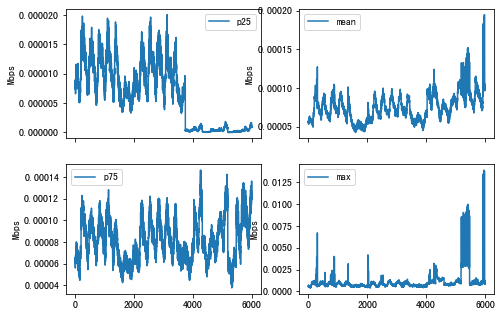

In [5]:
fig,ax=plt.subplots(2,2,sharex='col')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)

for idx, data in enumerate(data_distribs):
#     ax[idx//2,idx%2].plot(range(0,5000),data[0:5000])
    ax[idx//2,idx%2].plot(range(len(data)),data)
    ax[idx//2,idx%2].set_ylabel("Mbps")
    ax[idx//2,idx%2].legend(distribs_names[idx])

# on-off的数据生成逻辑(ori old ideas)

## 分析生成的数据的模拟情况

### burst=20

In [ ]:
ospf

In [163]:
MORE_DETAIL = False
# record_interval = "0.010000"      "0.100000"      "1.000000"
record_interval = "0.005000"

node =23
lamTimes=1  # 其实对于onoff影响不大
port=5571
proName="ospf-onoff" #"lp_73god_view" #"lp-trueTM"

parDir =f"/home/hesy/projects/ns3-test/data/{proName}/{record_interval}_lamTimes{lamTimes}_port{port}/"
util_file =f"traces/util_{record_interval}.txt"

file_list = [util_file] 
titles = ["link-tilization"]

CUT_OFF = 6000 # max timestep in pic

In [164]:
datas_ospf = [None]*len(file_list) # datas[i]包含 ( node*(node-1) , timestep ) 维度的数据 ( i是观测属性index，比如util )
# 从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[i] 包含["0.5": ... ; "0.9": ...] 的DataFrame
describes_ospf =[] # 每一行是一个时间点

attrs = [\
         '0.5',\
         '0.9',\
         'max']

for (i, file) in enumerate(file_list):
    datas_ospf[i] = pd.DataFrame(np.loadtxt(parDir+file))  # datas[0],也就是util,行是时间步，列是bi-link
    if file == util_file:
        datas_ospf[i]*=100
    # print(f"loading {parDir+file}")
    # print(f"\tdatas[i].shape is {datas_ospf[i].shape}")
    # print(f"\tdescribes[i].shape is {datas_ospf[i].transpose().quantile(0.9).shape}") # 默认是都是以第一个axis为一个unit进行统计  所以要transpose一下
    describes_ospf.append(pd.DataFrame({\
                                        "0.5":datas_ospf[i].transpose().quantile(0.5),\
                                        "0.9":datas_ospf[i].transpose().quantile(0.9),\
                                        "max":datas_ospf[i].transpose().quantile(1)\
                                       }))
    
import copy

origin_describe_ospf = copy.deepcopy(describes_ospf)
describes_cut_ospf = [ origin_data.iloc[:CUT_OFF,:] for origin_data in  origin_describe_ospf ]

In [190]:
cut=500

Text(0.5, 1.0, '23_recordInterval0.005000_lamTimes1_link-tilization')

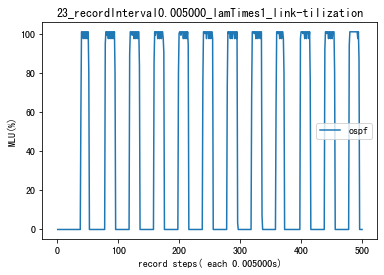

In [191]:
for datas in [\
#               describes_cut_rl,\
#               describes_cut_ben,\
              describes_cut_ospf\
             ]:
    for (i,data) in enumerate(datas):
            plt.plot(range(1,len(data[attrs[1]][:cut])+1),data['max'][:cut],'-')

plt.xlabel(f'record steps( each {record_interval}s)')
plt.ylabel('MLU(%)')
plt.legend([ 
#             'rl',\
#             'lp',\
            'ospf'\
           ])
fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
plt.title(fileName)

查看持续时间

Text(0.5, 1.0, '23_recordInterval0.005000_lamTimes1_link-tilization')

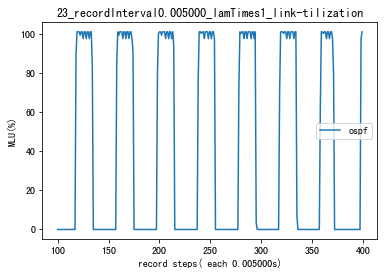

In [200]:
for datas in [\
#               describes_cut_rl,\
#               describes_cut_ben,\
              describes_cut_ospf\
             ]:
    for (i,data) in enumerate(datas):
#             plt.plot(range(1,len(data[attrs[1])+1),data['max'],'-')
            plt.plot(range(100,400),data['max'][100:400],'-')

plt.xlabel(f'record steps( each {record_interval}s)')
plt.ylabel('MLU(%)')
plt.legend([ 
#             'rl',\
#             'lp',\
            'ospf'\
           ])
fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
plt.title(fileName)

In [ ]:
平均性能

In [179]:
mean(describes_cut_ospf[0]['max'][:5000])

24.14682824

---

#### 平滑

cut 取前面部分

In [194]:
cut=50

In [184]:
from more_itertools import chunked
# describes_cut[0]是util的数据

# describes_smooth_rl= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_rl[0].values, 75//5)]
# describes_smooth_rl=pd.DataFrame(describes_smooth_rl,columns= attrs)

# describes_smooth_ben= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_ben[0].values, 75//5)]
# describes_smooth_ben=pd.DataFrame(describes_smooth_ben,columns= attrs)

describes_smooth_ospf= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_ospf[0].values, 75//5)]
describes_smooth_ospf=pd.DataFrame(describes_smooth_ospf,columns= attrs)

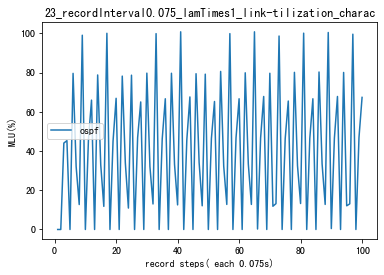

In [188]:
for data in [
#     describes_smooth_rl,\
#     describes_smooth_ben,\
    describes_smooth_ospf\
    ]:
    plt.plot(range(1,len(data['max'][:cut])+1),data['max'][:cut],'-')

plt.legend([\
#             'rl',\
#             'lp',\
            'ospf'\
           ])

record_interval_ = float(record_interval)*15
plt.xlabel(f'record steps( each {record_interval_}s)')
plt.ylabel('MLU(%)')
fileName= f"{node}_recordInterval{record_interval_}_lamTimes{lamTimes}_{titles[i]}"
fileName+=f"_charac"
plt.title(fileName)
plt.show()

#### 查看各链路情况

In [193]:
util_data_ospf = datas_ospf[0]

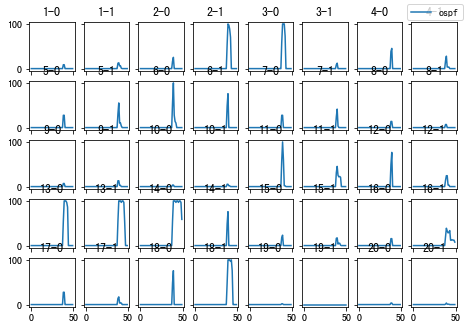

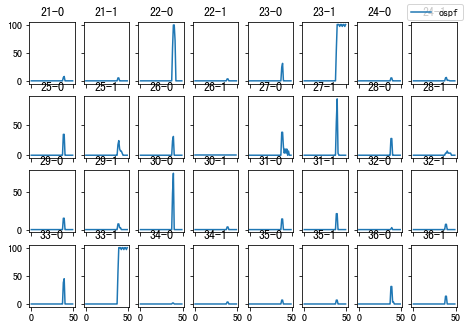

In [195]:
fig,ax=plt.subplots(5,8,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)
for linkIdx in range(40):
    img_idx = linkIdx-0
#     link_util_rl_5 >= util_data_rl_5.iloc[:,linkIdx]
#     link_util_lp_73 = util_data_lp_73.iloc[:,linkIdx]
    link_util_ospf = util_data_ospf.iloc[:,linkIdx]
#     link_util_or= util_data_or.iloc[:,linkIdx]
#     ax[img_idx//8,img_idx%8].plot(range(len(link_util_rl_5)),link_util_rl_5)
#     ax[img_idx//8,img_idx%8].plot(range(len(link_util_lp_73)),link_util_lp_73)
    ax[img_idx//8,img_idx%8].plot(range(len(link_util_ospf[:cut])),link_util_ospf[:cut])
#     ax[img_idx//8,img_idx%8].plot(range(len(link_util_or)),link_util_or)
    ax[img_idx//8,img_idx%8].set_title(f"{linkIdx//2 +1}-{linkIdx%2}")

fig.legend([
#             'rl',\
#             'lp',\
            'ospf',\
#             'or',\
           ])

### ======================================================
fig2,ax2=plt.subplots(4,8,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)
for linkIdx in range(40,72):
    img_idx = linkIdx-40
#     link_util_rl_5 = util_data_rl_5.iloc[:,linkIdx]
#     link_util_lp_73 = util_data_lp_73.iloc[:,linkIdx]
    link_util_ospf = util_data_ospf.iloc[:,linkIdx]
#     link_util_or = util_data_or.iloc[:,linkIdx]
#     ax2[img_idx//8,img_idx%8].plot(range(len(link_util_rl_5)),link_util_rl_5)
#     ax2[img_idx//8,img_idx%8].plot(range(len(link_util_lp_73)),link_util_lp_73)
    ax2[img_idx//8,img_idx%8].plot(range(len(link_util_ospf[:cut])),link_util_ospf[:cut])
#     ax2[img_idx//8,img_idx%8].plot(range(len(link_util_or)),link_util_or)
    ax2[img_idx//8,img_idx%8].set_title(f"{linkIdx//2 +1}-{linkIdx%2}")

fig2.legend([\
#             'rl',\
#             'lp',\
            'ospf',\
#             'or',\
           ])

### burst=10

#### ospf

In [401]:
MORE_DETAIL = False
# record_interval = "0.010000"      "0.100000"      "1.000000"
record_interval = "0.005000"

node =23
lamTimes=1  # 其实对于onoff影响不大
port=5571
proName="ospf-onoff-with-burst10" #"lp_73god_view" #"lp-trueTM"

parDir =f"/home/hesy/projects/ns3-test/data/{proName}/{record_interval}_lamTimes{lamTimes}_port{port}/"
util_file =f"traces/util_{record_interval}.txt"

file_list = [util_file] 
titles = ["link-tilization"]

CUT_OFF = 6000 # max timestep in pic

In [402]:
datas_ospf = [None]*len(file_list) # datas[i]包含 ( node*(node-1) , timestep ) 维度的数据 ( i是观测属性index，比如util )
# 从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[i] 包含["0.5": ... ; "0.9": ...] 的DataFrame
describes_ospf =[] # 每一行是一个时间点

attrs = [\
         '0.5',\
         '0.9',\
         'max']

for (i, file) in enumerate(file_list):
    datas_ospf[i] = pd.DataFrame(np.loadtxt(parDir+file))  # datas[0],也就是util,行是时间步，列是bi-link
    if file == util_file:
        datas_ospf[i]*=100
    # print(f"loading {parDir+file}")
    # print(f"\tdatas[i].shape is {datas_ospf[i].shape}")
    # print(f"\tdescribes[i].shape is {datas_ospf[i].transpose().quantile(0.9).shape}") # 默认是都是以第一个axis为一个unit进行统计  所以要transpose一下
    describes_ospf.append(pd.DataFrame({\
                                        "0.5":datas_ospf[i].transpose().quantile(0.5),\
                                        "0.9":datas_ospf[i].transpose().quantile(0.9),\
                                        "max":datas_ospf[i].transpose().quantile(1)\
                                       }))
    
import copy

origin_describe_ospf = copy.deepcopy(describes_ospf)
describes_cut_ospf = [ origin_data.iloc[:CUT_OFF,:] for origin_data in  origin_describe_ospf ]

In [404]:
# cut=1000
# cut=100
cut=2000
cut=6000
# cut=10000

Text(0.5, 1.0, '23_recordInterval0.005000_lamTimes1_link-tilization')

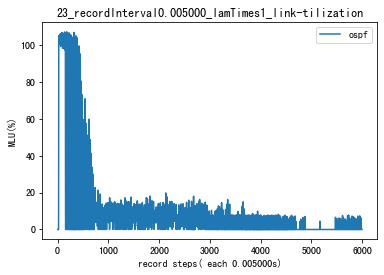

In [405]:
for datas in [\
#               describes_cut_rl,\
#               describes_cut_ben,\
              describes_cut_ospf\
             ]:
    for (i,data) in enumerate(datas):
            plt.plot(range(1,len(data[attrs[1]][:cut])+1),data['max'][:cut],'-')
#             plt.plot(range(1,len(data[attrs[1]][4000:5000])+1),data['max'][4000:5000],'-')

plt.xlabel(f'record steps( each {record_interval}s)')
plt.ylabel('MLU(%)')
plt.legend([ 
#             'rl',\
#             'lp',\
            'ospf'\
           ])
fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
plt.title(fileName)

#### 平滑

cut 取前面部分

In [296]:
cut=500

In [407]:
from more_itertools import chunked
# describes_cut[0]是util的数据

# describes_smooth_rl= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_rl[0].values, 75//5)]
# describes_smooth_rl=pd.DataFrame(describes_smooth_rl,columns= attrs)

# describes_smooth_ben= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_ben[0].values, 75//5)]
# describes_smooth_ben=pd.DataFrame(describes_smooth_ben,columns= attrs)

describes_smooth_ospf= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_ospf[0].values, 75//5)]
describes_smooth_ospf=pd.DataFrame(describes_smooth_ospf,columns= attrs)

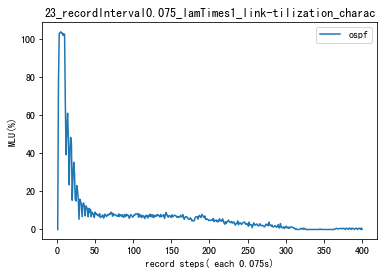

In [408]:
for data in [
#     describes_smooth_rl,\
#     describes_smooth_ben,\
    describes_smooth_ospf\
    ]:
    plt.plot(range(1,len(data['max'][:cut])+1),data['max'][:cut],'-')

plt.legend([\
#             'rl',\
#             'lp',\
            'ospf'\
           ])

record_interval_ = float(record_interval)*15
plt.xlabel(f'record steps( each {record_interval_}s)')
plt.ylabel('MLU(%)')
fileName= f"{node}_recordInterval{record_interval_}_lamTimes{lamTimes}_{titles[i]}"
fileName+=f"_charac"
plt.title(fileName)
plt.show()

#### 查看各链路情况

In [287]:
util_data_ospf = datas_ospf[0]

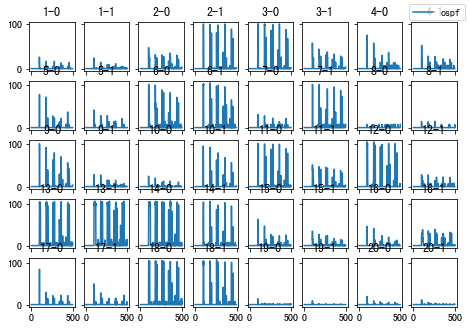

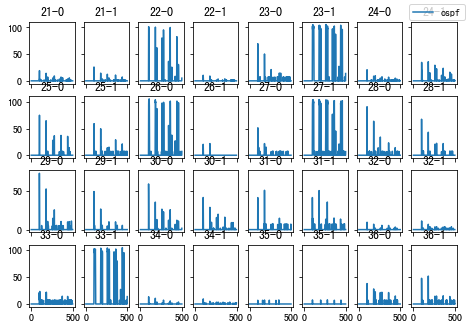

In [297]:
fig,ax=plt.subplots(5,8,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)
for linkIdx in range(40):
    img_idx = linkIdx-0
#     link_util_rl_5 >= util_data_rl_5.iloc[:,linkIdx]
#     link_util_lp_73 = util_data_lp_73.iloc[:,linkIdx]
    link_util_ospf = util_data_ospf.iloc[:,linkIdx]
#     link_util_or= util_data_or.iloc[:,linkIdx]
#     ax[img_idx//8,img_idx%8].plot(range(len(link_util_rl_5)),link_util_rl_5)
#     ax[img_idx//8,img_idx%8].plot(range(len(link_util_lp_73)),link_util_lp_73)
    ax[img_idx//8,img_idx%8].plot(range(len(link_util_ospf[:cut])),link_util_ospf[:cut])
#     ax[img_idx//8,img_idx%8].plot(range(len(link_util_or)),link_util_or)
    ax[img_idx//8,img_idx%8].set_title(f"{linkIdx//2 +1}-{linkIdx%2}")

fig.legend([
#             'rl',\
#             'lp',\
            'ospf',\
#             'or',\
           ])

### ======================================================
fig2,ax2=plt.subplots(4,8,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)
for linkIdx in range(40,72):
    img_idx = linkIdx-40
#     link_util_rl_5 = util_data_rl_5.iloc[:,linkIdx]
#     link_util_lp_73 = util_data_lp_73.iloc[:,linkIdx]
    link_util_ospf = util_data_ospf.iloc[:,linkIdx]
#     link_util_or = util_data_or.iloc[:,linkIdx]
#     ax2[img_idx//8,img_idx%8].plot(range(len(link_util_rl_5)),link_util_rl_5)
#     ax2[img_idx//8,img_idx%8].plot(range(len(link_util_lp_73)),link_util_lp_73)
    ax2[img_idx//8,img_idx%8].plot(range(len(link_util_ospf[:cut])),link_util_ospf[:cut])
#     ax2[img_idx//8,img_idx%8].plot(range(len(link_util_or)),link_util_or)
    ax2[img_idx//8,img_idx%8].set_title(f"{linkIdx//2 +1}-{linkIdx%2}")

fig2.legend([\
#             'rl',\
#             'lp',\
            'ospf',\
#             'or',\
           ])

# others

## drl-te的训练情况

In [411]:
train_1000_500 = np.loadtxt("/home/hesy/projects/MARL/train-drlte/log/log/hesy-train-1000-500/util.log")
train_5000_500 = np.loadtxt("/home/hesy/projects/MARL/train-drlte/log/log/hesy-train-5000-500/util.log")
train_10000_50 = np.loadtxt("/home/hesy/projects/MARL/drlte-gea-train/DRLTE/log/log/hesy-train-10000-50/util.log")
train_5000_50 = np.loadtxt("/home/hesy/projects/MARL/drlte-gea-train/DRLTE/log/log/hesy-train-5000-50/util.log")

In [426]:
from more_itertools import chunked
# describes_cut[0]是util的数据

smooth_1000_500= [ np.array(x).sum(axis=0)/len(x) for x in chunked(train_1000_500, 500)]
smooth_5000_500= [ np.array(x).sum(axis=0)/len(x) for x in chunked(train_5000_500, 2500)]
smooth_10000_50= [ np.array(x).sum(axis=0)/len(x) for x in chunked(train_10000_50, 200)]
smooth_5000_50= [ np.array(x).sum(axis=0)/len(x) for x in chunked(train_5000_50, 100)]

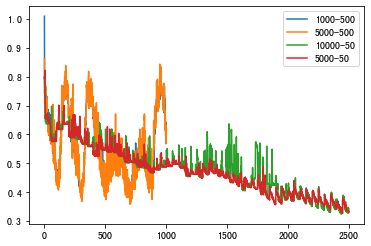

In [427]:
datas =[
    smooth_1000_500,
    smooth_5000_500,
    np.array(smooth_10000_50)/10,   # 所以是为啥会大10倍有点忘了,也许是跟训练的设定有关吧
    np.array(smooth_5000_50)/10,
]
names =  [
    "1000-500",
    "5000-500",
    "10000-50",
    "5000-50",
]

for data in datas:
#     plt.plot(range(len(data[:1000000])),data[:1000000])
    plt.plot(range(len(data)),data)

plt.legend(names)

按照比例平滑了之后差不多...

In [142]:
pd.DataFrame(np.array(tms.iloc[4560]*30*40/100*1000000/8).reshape(23,23)).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,232528.592000,85743.408000,97282.133333,38949.808000,5527.704000,80.829333,241389.985333,5898.074667,1.813594e+04,8524.681333,...,946.962667,11371.022667,365889.185333,2.322225e+05,1.701088e+05,9997.037333,7445.214667,66466.252000,83162.666667,2449.658667
1,591704.533333,41161.244000,2605.866667,360945.896000,12099.437333,339801.837333,115746.014667,45521.777333,6.076172e+04,30934.874667,...,31823.881333,582.162667,10657.422667,2.309065e+05,1.936046e+06,14466.489333,27684.266667,126667.970667,33499.258667,291.556000
2,99348.504000,103170.252000,670.458667,626364.918667,6972.681333,137.244000,61789.274667,10324.266667,1.993932e+04,11293.510667,...,2425.600000,21269.570667,49546.904000,4.457412e+05,1.014886e+04,23745.658667,28990.458667,121892.385333,16379.258667,2647.466667
3,322408.058667,602932.504000,31643.733333,29.274667,31892.029333,591.170667,864008.652000,22987.496000,2.348871e+04,0.000000,...,20859.022667,32480.356000,34765.629333,6.956448e+05,7.103917e+04,79376.118667,19756.089333,208740.029333,30412.562667,12211.318667
4,107073.066667,9850.666667,9153.185333,9138.962667,0.000000,1031.110667,2647.348000,66309.925333,1.357486e+06,4617.718667,...,98.608000,93445.925333,20153.125333,6.467078e+06,3.512533e+03,1247.525333,172588.444000,12260.741333,58642.252000,4381.748000
